In [1]:
### --- Libraries --- ###
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from scipy.stats import linregress
from scipy.integrate import trapz
from scipy.stats import norm
import matplotlib.ticker as ticker
from matplotlib import gridspec
import matplotlib.mlab as mlab

1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.



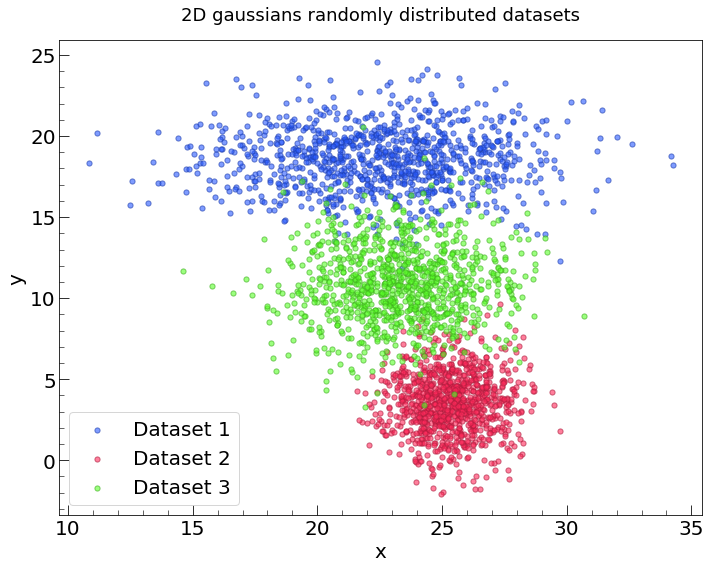

In [19]:
def generate_gauss(n_points):
    '''
        Function to generate 2d gaussian datasets:
        - it takes as input parameter the number of points
        - mean and standard deviation for each dataset are
        generated randomly 

    '''
    x = np.random.normal(np.random.uniform(0.,40.), np.random.uniform(0.,4.), n_points)
    y = np.random.normal(np.random.uniform(0.,40.), np.random.uniform(0.,4.), n_points)
    return x, y

fig, ax = plt.subplots(figsize=(10, 8))

# generate 3 datasets -
x1, y1 = generate_gauss(1000)
x2, y2 = generate_gauss(1000)
x3, y3 = generate_gauss(1000)

# plot
ax.scatter(x1, y1, marker='o', s = 27, color='#2A5BFF', edgecolor='#1C3CAA', alpha=0.6, label='Dataset 1')
ax.scatter(x2, y2, marker='o', s = 27, color='#FF2A5B', edgecolor='#AA1C3C', alpha=0.6, label='Dataset 2')
ax.scatter(x3, y3, marker='o', s = 27, color='#5BFF2A', edgecolor='#3CAA1C', alpha=0.6, label='Dataset 3')

# plot settings
ax.set_title('2D gaussians randomly distributed datasets', size=18, pad = 20)
ax.set_ylabel('y',fontsize = 20, loc = 'center')
ax.set_xlabel('x', fontsize = 20, loc = 'center')
ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
ax.minorticks_on()
ax.legend(prop={'size': 20}, loc = 'best')

fig.tight_layout()
plt.show()

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [3]:
data = pd.DataFrame(np.load("data/residuals_261.pkl", allow_pickle = True).item())
# select only entries with residual greater than -2, smaller than 2
data = data.loc[(data["residuals"] > -2) & (data["residuals"] < 2)]
data

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [4]:
data.describe()

,residuals,distances
count,10489.000000,10489.000000
mean,-0.121878,9.954824
std,0.439143,5.847142
min,-2.000000,0.000000
25%,-0.280000,4.700000
50%,-0.100000,10.000000
75%,0.070000,15.100000
max,1.992857,24.900000


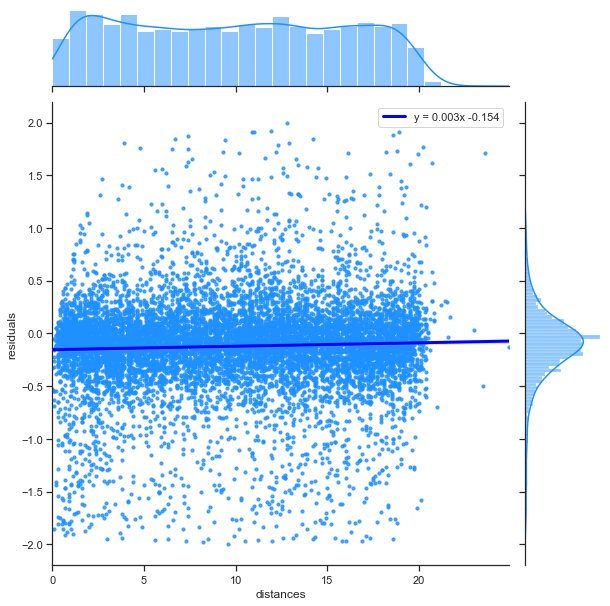

In [7]:
# seaborn jointplot
sns.set(style='ticks')
# perform a linear regression using scipy
slope, intercept, rvalue, pvalue, std_err = linregress(data.distances, data.residuals)
jp = sns.jointplot(x='distances', y='residuals', data=data, kind = 'reg', color = 'dodgerblue', 
                    scatter_kws={'s': 10}, line_kws={'color': 'blue','lw' : 3, 'label':"y = {0:1.3f}x {1:1.3f}".format(slope, intercept)})
# plot legend
jp.ax_joint.legend()
jp.fig.set_size_inches(9,9)

**Correlation between variables**: there seems to be a linear relation between the two variables, but the correlation 
of the variables is almost zero. This aspect can be further analyzed by visualizing the results obtained using the 
seaborn.pairplot() function. 

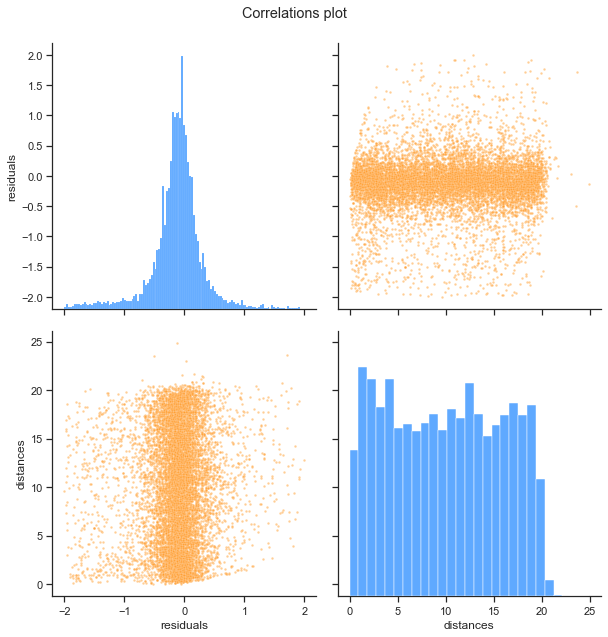

In [6]:
# correlation plot
sns.set(style='ticks')
g = sns.pairplot(data, plot_kws={'alpha':0.5, 's' : 6, 'color':'#FF9C2A'},diag_kws= {'color': '#2A8DFF'})
g.fig.suptitle("Correlations plot", y =1.03)
g.fig.set_size_inches(9,9)

In [8]:
# retrieve the edges of the bins used by the histogram function
bins_dist = np.histogram_bin_edges(data.distances, bins='sqrt')
# array of bin centers
x = np.array([0.5 * (bins_dist[i] + bins_dist[i+1]) for i in range(len(bins_dist) - 1)])
# array of mean values of the residuals 
y = np.array([(np.mean(data.loc[(data['distances'] > bins_dist[i]) & 
                (data['distances'] < bins_dist[i+1])].residuals)) for i in range(len(bins_dist)-1)])
# array of standard deviations 
err_y = np.array([(np.std(data.loc[(data['distances'] > bins_dist[i]) &
                 (data['distances'] < bins_dist[i+1])].residuals)) for i in range(len(bins_dist)-1)])

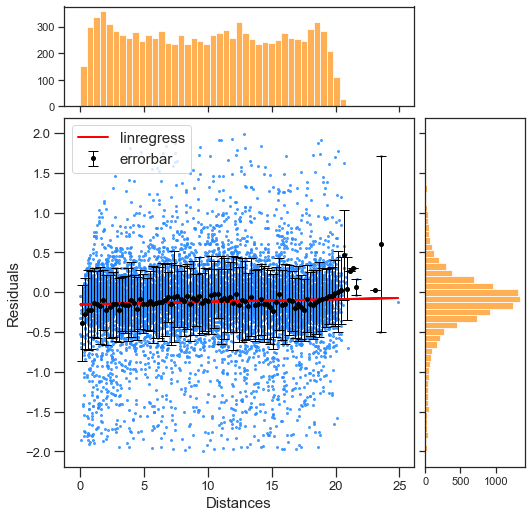

In [9]:
# Manually create profile plot

fig = plt.figure(figsize=(8, 8))
# add a gridspec with two rows and two columns 
# adjust the subplot parameters for a square plot
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

x_data = data['distances']
y_data = data['residuals']

# --- Scatter plot --- #
ax.scatter(x_data, y_data, marker = 'o', s = 4, color = '#2A8DFF', alpha = 0.8)

# perform a linear regression using scipy
slope, intercept, rvalue, pvalue, std_err = linregress(data.distances, data.residuals)

# plot settings
ax.plot(data.distances, intercept + slope*data.distances, 'y', linewidth = 2, label = 'linregress', color = 'red')
ax.errorbar(x, y, yerr=err_y,lw = 0, marker = 'o', markersize=4, markeredgecolor = 'black',
                    markerfacecolor = 'black',ecolor='black', elinewidth=1, capsize=5, label = 'errorbar')
ax.set_ylabel('Residuals',fontsize = 15, loc = 'center')
ax.set_xlabel('Distances', fontsize = 15, loc = 'center')
ax.tick_params(axis = 'both', which = 'major', direction = 'out', length = 10,labelsize = 13)
ax.legend(prop={'size': 15}, loc = 'best')

# --- Histograms --- #
ax_histx.hist(x_data,  bins=np.linspace(x_data.min(), x_data.max()), color = '#FF9C2A', alpha = 0.8)
ax_histy.hist(y_data, bins=np.linspace(y_data.min(), y_data.max()), color = '#FF9C2A',alpha = 0.8, orientation='horizontal')

# no labels on histogram projections plot
ax_histx.tick_params(axis='x', labelbottom=False)
ax_histy.tick_params(axis='y', labelleft=False)

plt.show()

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


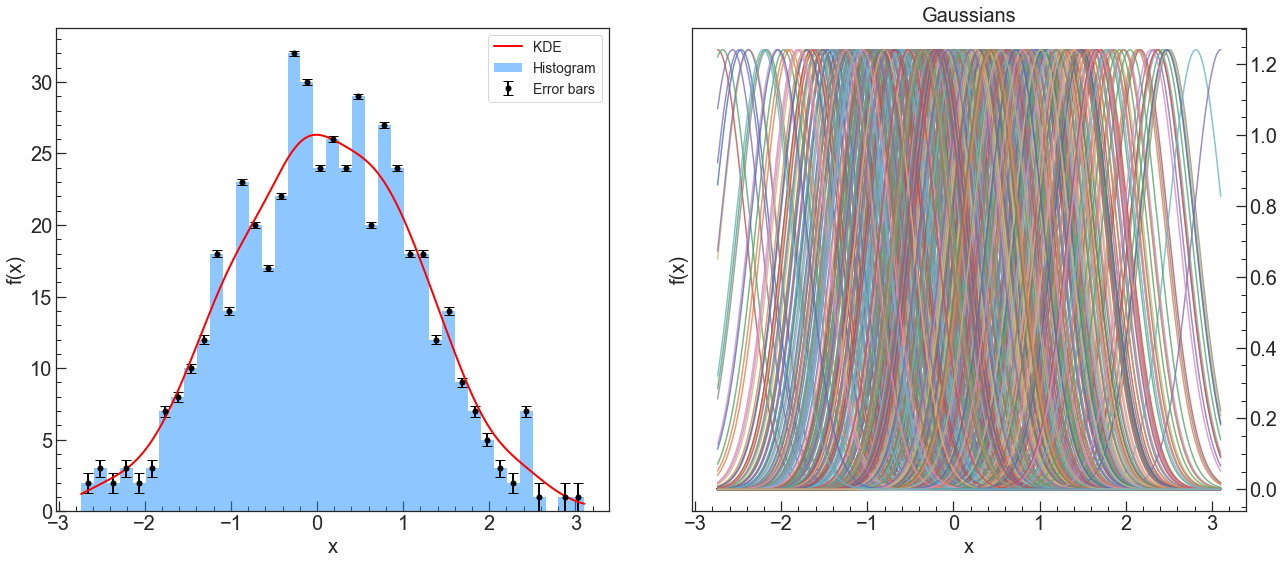

In [29]:
# plot layout
fig,((ax1,ax2)) = plt.subplots(1,2,figsize=(18,8))

# fill array with normally distributed variable
N = 500
x = np.array(np.random.normal(0., 1., N))

# define values for binning 
min_x = np.min(x)
max_x = np.max(x)
step = 40

# histogram
data, bins, __ = ax1.hist(x, bins=np.linspace(min_x, max_x, step), range=(min_x, max_x), 
                                alpha=0.5, color='dodgerblue', edgecolor = 'None',linewidth=2, label = 'Histogram')
# bin centers
centerbins = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins) - 1)])

# set zero values to None because we cannot divide by zero
data[data == 0] = None
# set Poisson uncertainty on each bin
poisson_err = 1 /np.sqrt(data)

# plot
ax1.errorbar(centerbins, data, yerr=poisson_err, label='Error bars', marker = 'o',markerfacecolor = 'black',
                                markeredgecolor = 'black',markersize=5, lw = 0, ecolor='black', elinewidth=2, capsize=5)
ax1.set_xlabel('x', fontsize = 20)
ax1.set_ylabel('f(x)', fontsize = 20)                              
ax1.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 20)
ax1.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
ax1.minorticks_on()


# --- Gaussian functions --- #

# default standard deviation
sigma = 1.06*x.std()*x.size**(-1/5)
# range of the gaussians
xg = np.linspace(x.min(), x.max(), N)
gaussians = np.zeros((N,N))

# plot a gaussian for every value
for i in range(N):    
    gaussians[i] = norm.pdf(xg, x[i], sigma)
    ax2.plot(xg, gaussians[i], alpha = 0.8)

ax2.set_title('Gaussians', fontsize = 20)
ax2.set_xlabel('x', fontsize = 20)
ax2.set_ylabel('f(x)', fontsize = 20)
ax2.yaxis.tick_right()
ax2.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 20)
ax2.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
ax2.minorticks_on()


# --- KDE --- #

# retrieve zero values
data = np.nan_to_num(data)

# sum the gaussians
sumg = np.sum(gaussians, axis=0)

# bin width
bin_width = bins[1] - bins[0]

# calculate the integral
area = trapz(y = sumg, x = xg)

# integral of original histogram
int_hist = bin_width * sum(data[:])

ax1.plot(xg, sumg*int_hist/area,color = 'red',linewidth=2, label='KDE')
ax1.legend(loc='best', fontsize=14)

fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15)
plt.show()